<a href="https://colab.research.google.com/github/user960507/DeepMachineLearning/blob/master/Copia_de_ETH_Coin_Predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#INSTALL THESE PACKAGES IF NEEDED

In [3]:
!pip install yfinance
!pip install yahoofinancials

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.5/41.5 kB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for yahoofinancials: filename=yahoofinancials-1.14-py3-none-any.whl size=28627 sha256=0496c2f1188bab707b72a7c9d799d0823fc2d30e0bcd936dafd75c20d5069a3b
  Stored in directory: /root/.cache/pip/wheels/32/a3/b6/b5b33187f2d42f095fecc236b957b46173fa09e78a106e309f
Successfully built yahoofinancials


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error as mae
from sklearn.preprocessing import StandardScaler
import yfinance as yf
from yahoofinancials import YahooFinancials

#CREATING THE DATAFRAME TO STORE DATA


In [5]:
df = yf.download('ETH-USD', 
                      start='2021-01-01', 
                      end='2023-05-20', 
                      progress=False)
df.head()
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-05-15,1800.371216,1845.695435,1787.536377,1817.549927,1817.549927,6748889346
2023-05-16,1816.824219,1830.351562,1797.843750,1824.121460,1824.121460,5595959668
2023-05-17,1824.068359,1835.554565,1786.671997,1821.859619,1821.859619,6352161579
2023-05-18,1822.068237,1831.450317,1774.195068,1801.728516,1801.728516,5673124255
2023-05-19,1800.994385,1826.194214,1797.434448,1812.589478,1812.589478,4796110259


In [6]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-01,737.708374,749.201843,719.792236,730.367554,730.367554,13652004358
2021-01-02,730.402649,786.798462,718.109497,774.534973,774.534973,19740771179
2021-01-03,774.511841,1006.565002,771.561646,975.507690,975.507690,45200463368
2021-01-04,977.058838,1153.189209,912.305359,1040.233032,1040.233032,56945985763
2021-01-05,1041.498779,1129.371460,986.811279,1100.006104,1100.006104,41535932781


In [7]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-05-15,1800.371216,1845.695435,1787.536377,1817.549927,1817.549927,6748889346
2023-05-16,1816.824219,1830.351562,1797.843750,1824.121460,1824.121460,5595959668
2023-05-17,1824.068359,1835.554565,1786.671997,1821.859619,1821.859619,6352161579
2023-05-18,1822.068237,1831.450317,1774.195068,1801.728516,1801.728516,5673124255
2023-05-19,1800.994385,1826.194214,1797.434448,1812.589478,1812.589478,4796110259


In [8]:
series = df['Close'].values.reshape(-1, 1)

In [9]:
scaler = StandardScaler()
scaler.fit(series[0:len(series) // 2])
series = scaler.transform(series).flatten()

# Plot it

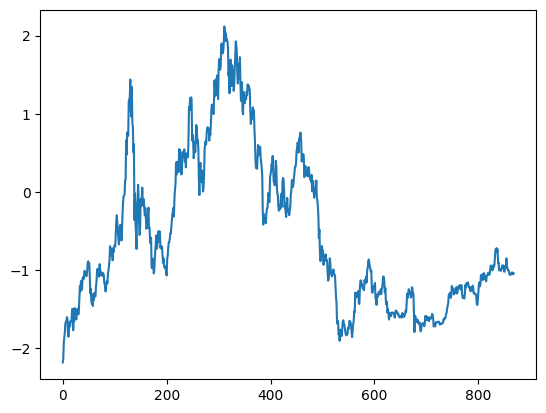

In [10]:
plt.plot(series)
plt.show()

In [11]:
T = 10
D = 1
X = []
Y = []
for t in range(len(series) - T):
  x = series[t:t+T]
  X.append(x)
  y = series[t+T]
  Y.append(y)

X = np.array(X).reshape(-1, T)
Y = np.array(Y)
N = len(X)
print("X.shape", X.shape, "Y.shape", Y.shape)

X.shape (859, 10) Y.shape (859,)


In [12]:
class BaselineModel:
  def predict(self, X):
    return X[:,-1]

In [13]:
Xtrain, Ytrain = X[:-N//2], Y[:-N//2]
Xtest, Ytest = X[-N//2:], Y[-N//2:]

In [14]:
model = BaselineModel()
Ptrain = model.predict(Xtrain)
Ptest = model.predict(Xtest)

In [20]:
Ytrain2 = scaler.inverse_transform(Ytrain.reshape(-1, 1)).flatten()
Ytest2 = scaler.inverse_transform(Ytest.reshape(-1, 1)).flatten()
Ptrain2 = scaler.inverse_transform(Ptrain.reshape(-1, 1)).flatten()
Ptest2 = scaler.inverse_transform(Ptest.reshape(-1, 1)).flatten()

In [16]:
print("baseline train mae:", mae(Ytrain2, Ptrain2))
print("baseline test mae:", mae(Ytest2, Ptest2))

baseline train mae: 106.91557543205492
baseline test mae: 48.357524073401166


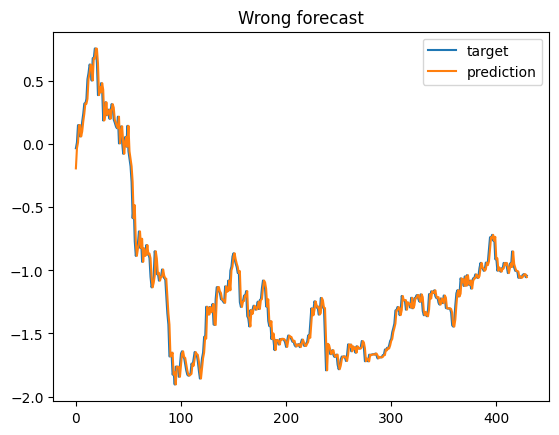

In [17]:
plt.plot(Ytest, label='target')
plt.plot(Ptest, label='prediction')
plt.legend()
plt.title("Wrong forecast")
plt.show()

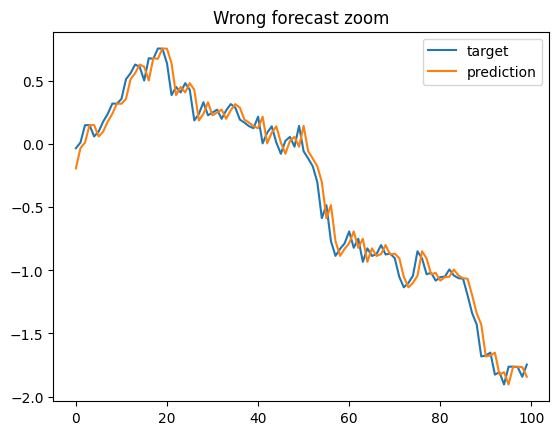

In [18]:
plt.plot(Ytest[0:100], label='target')
plt.plot(Ptest[0:100], label='prediction')
plt.legend()
plt.title("Wrong forecast zoom")
plt.show()

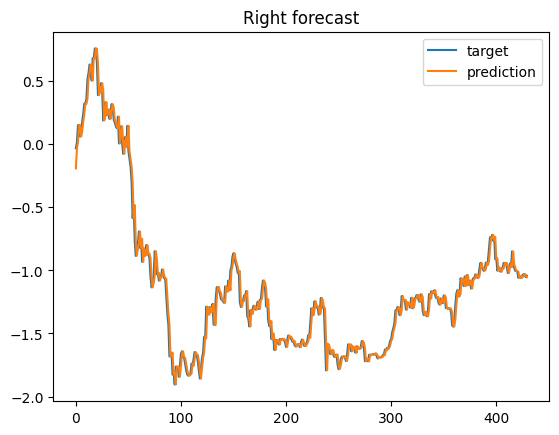

In [24]:
forecast = []
count = 0


while len(forecast) < len(Ytest):
  input_ = Xtest[count]
  f = model.predict(input_.reshape(1, T))[0]
  forecast.append(f)
  count = count + 1

  # make a new input with the latest forecast
  input_ = np.roll(input_, -1)
  input_[-1] = f
plt.plot(Ytest, label='target')
plt.plot(forecast, label='prediction')
plt.legend()
plt.title("Right forecast")
plt.show()